In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Simulate data for 100,000 buyers
np.random.seed(42)
n_buyers = 100000
precio = np.random.choice(['Bajo', 'Medio', 'Alto'], size=n_buyers, p=[0.3, 0.4, 0.3])
criticas = np.random.choice(['Alta', 'Baja'], size=n_buyers, p=[0.6, 0.4])
amigos = np.random.choice(['Sí', 'No'], size=n_buyers, p=[0.4, 0.6])

compra = np.zeros(n_buyers)

In [8]:
for i in range(n_buyers):
    # Escenario ideal: Barato, buenas críticas y amigos jugando
    if precio[i] == 'Bajo' and criticas[i] == 'Alta' and amigos[i] == 'Sí':
        compra[i] = np.random.choice([1, 0], p=[0.90, 0.10])
    
    # Escenario difícil: Caro, malas críticas y solo
    elif precio[i] == 'Alto' and criticas[i] == 'Baja' and amigos[i] == 'No':
        compra[i] = np.random.choice([1, 0], p=[0.05, 0.95])
    
    # Escenario intermedio (ejemplo: Precio Medio y Críticas Altas)
    elif precio[i] == 'Medio' and criticas[i] == 'Alta':
        compra[i] = np.random.choice([1, 0], p=[0.60, 0.40])
    
    # Por defecto para el resto de combinaciones
    else:
        compra[i] = np.random.choice([1, 0], p=[0.20, 0.80])

In [9]:
df = pd.DataFrame({
    'Precio': precio, 
    'Criticas': criticas, 
    'Amigos': amigos, 
    'Compra': compra
})

In [10]:
prob_compra = df.groupby(['Precio', 'Criticas', 'Amigos'])['Compra'].mean().reset_index()

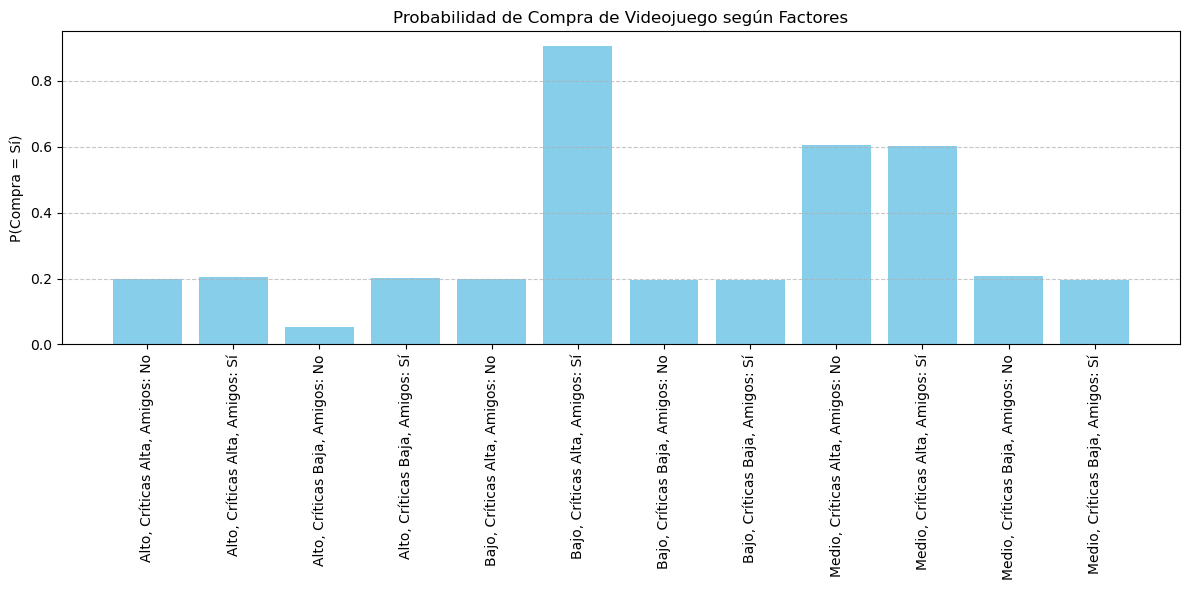

In [11]:
prob_compra['Etiqueta'] = prob_compra['Precio'] + ", Críticas " + prob_compra['Criticas'] + ", Amigos: " + prob_compra['Amigos']

plt.figure(figsize=(12, 6))
plt.bar(prob_compra['Etiqueta'], prob_compra['Compra'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('P(Compra = Sí)')
plt.title('Probabilidad de Compra de Videojuego según Factores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()